# Vizualized model

`ABSESpy` provides a basic visualization of the model. The visualization is based on the `matplotlib`, `xarray`, `geopandas`, and `networkx` library. The visualization is not perfect, but it can help to understand the model structure.

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

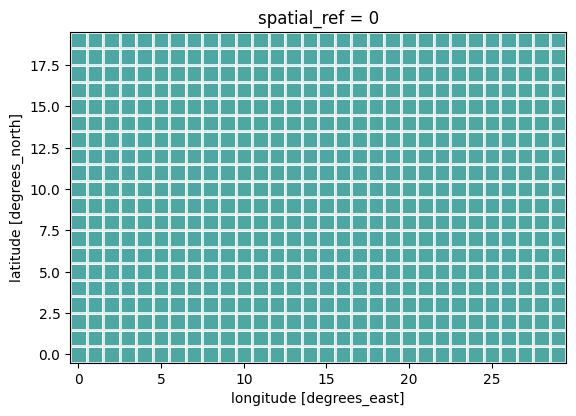

In [1]:
import abses

model = abses.main.MainModel()
module = model.nature.create_module("from_resolution", shape=(20, 30))
module.plot.show()

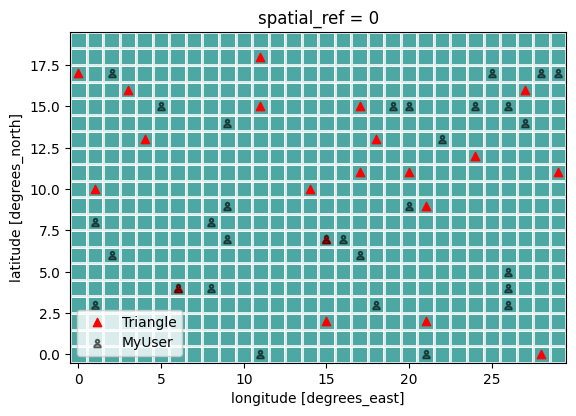

In [2]:
from abses import Actor


class Triangle(Actor):
    marker = "^"
    color = "#FF0000"


class MyUser(Actor):
    marker = "user"
    color = "#000000"
    alpha = 0.5


new_agents = module.random.new(Triangle, size=20)
new_agents = module.random.new(MyUser, size=30)

module.plot.show();